In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


Converting the given CSV file into DataFrame using Pandas

In [92]:
df=pd.read_csv(r"C:\Users\Nani\Downloads\temperatures.csv")

In [93]:
df

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,TT_TU_MN009,2014,201501010000,3.4,7,6
1,TT_TU_MN009,2014,201501010100,3.1,7,6
2,TT_TU_MN009,2014,201501010200,2.6,7,1
3,TT_TU_MN009,2014,201501010300,2.8,7,1
4,TT_TU_MN009,2014,201501010400,2.5,7,1
...,...,...,...,...,...,...
45163,TT_TU_MN009,2014,202002251900,5.3,0,1
45164,TT_TU_MN009,2014,202002252000,5.5,0,1
45165,TT_TU_MN009,2014,202002252100,5.4,0,1
45166,TT_TU_MN009,2014,202002252200,3.8,0,1


Isolating "Zeitstempel" and "Wert" Column into another dataframe since we will be handling only these two columns for our tasks

In [94]:
df_new = df[["Zeitstempel","Wert"]]

Formatting the Zeitstempel.

In [95]:
df_new['Zeitstempel'] = pd.to_datetime(df_new['Zeitstempel'], format='%Y%m%d%H%M')

In [96]:
df_new

,Zeitstempel,Wert
0,2015-01-01 00:00:00,3.4
1,2015-01-01 01:00:00,3.1
2,2015-01-01 02:00:00,2.6
3,2015-01-01 03:00:00,2.8
4,2015-01-01 04:00:00,2.5
...,...,...
45163,2020-02-25 19:00:00,5.3
45164,2020-02-25 20:00:00,5.5
45165,2020-02-25 21:00:00,5.4
45166,2020-02-25 22:00:00,3.8


**Task 1:**

Converting the time steps into 15 minutes interval using resampling technique

In [97]:
df_new= df_new.set_index('Zeitstempel').resample('900s').mean()


In [98]:
df_new

,Wert
Zeitstempel,
2015-01-01 00:00:00,3.4
2015-01-01 00:15:00,NaN
2015-01-01 00:30:00,NaN
2015-01-01 00:45:00,NaN
2015-01-01 01:00:00,3.1
...,...
2020-02-25 22:00:00,3.8
2020-02-25 22:15:00,NaN
2020-02-25 22:30:00,NaN


Now the next task is to fill out the NaN values Using Linear Interpolating.

In [99]:
df_new = df_new.interpolate()

In [100]:
df_new

,Wert
Zeitstempel,
2015-01-01 00:00:00,3.400
2015-01-01 00:15:00,3.325
2015-01-01 00:30:00,3.250
2015-01-01 00:45:00,3.175
2015-01-01 01:00:00,3.100
...,...
2020-02-25 22:00:00,3.800
2020-02-25 22:15:00,3.750
2020-02-25 22:30:00,3.700


Now we have successfully divided the given data into 15 minute time interval.

Task 2:

Collecting the hottest and coldest temperature for every year with their time of occurence

In [101]:
df_new.reset_index(inplace=True)

Creating a New column to keep track of the time which we are interested in.

In [102]:
df_new['Time'] = pd.to_datetime(df_new['Zeitstempel']).dt.time


In [103]:
df_new['Date'] = pd.to_datetime(df_new['Zeitstempel']).dt.date


In [104]:
df_new

,Zeitstempel,Wert,Time,Date
0,2015-01-01 00:00:00,3.400,00:00:00,2015-01-01
1,2015-01-01 00:15:00,3.325,00:15:00,2015-01-01
2,2015-01-01 00:30:00,3.250,00:30:00,2015-01-01
3,2015-01-01 00:45:00,3.175,00:45:00,2015-01-01
4,2015-01-01 01:00:00,3.100,01:00:00,2015-01-01
...,...,...,...,...
180664,2020-02-25 22:00:00,3.800,22:00:00,2020-02-25
180665,2020-02-25 22:15:00,3.750,22:15:00,2020-02-25
180666,2020-02-25 22:30:00,3.700,22:30:00,2020-02-25
180667,2020-02-25 22:45:00,3.650,22:45:00,2020-02-25


**Grouping** with respect to every year and finding the **maximum Wert value** in that group.

In [105]:
df_hot = df_new.groupby((df_new.Zeitstempel.dt.strftime('%y'))).apply(lambda group: group[group.Wert == group.Wert.max()])\
  .reset_index(drop=True)

In [106]:
df_hot

,Zeitstempel,Wert,Time,Date
0,2015-07-04 14:00:00,36.0,14:00:00,2015-07-04
1,2016-08-28 14:00:00,34.0,14:00:00,2016-08-28
2,2017-06-22 11:00:00,31.9,11:00:00,2017-06-22
3,2018-08-07 15:00:00,35.6,15:00:00,2018-08-07
4,2019-07-25 13:00:00,37.4,13:00:00,2019-07-25
5,2020-02-16 19:00:00,17.7,19:00:00,2020-02-16
6,2020-02-16 19:15:00,17.7,19:15:00,2020-02-16
7,2020-02-16 19:30:00,17.7,19:30:00,2020-02-16
8,2020-02-16 19:45:00,17.7,19:45:00,2020-02-16
9,2020-02-16 20:00:00,17.7,20:00:00,2020-02-16


In [107]:
df_hot.drop("Zeitstempel", axis=1 ,inplace = True)

In [108]:
df_hot

,Wert,Time,Date
0,36.0,14:00:00,2015-07-04
1,34.0,14:00:00,2016-08-28
2,31.9,11:00:00,2017-06-22
3,35.6,15:00:00,2018-08-07
4,37.4,13:00:00,2019-07-25
5,17.7,19:00:00,2020-02-16
6,17.7,19:15:00,2020-02-16
7,17.7,19:30:00,2020-02-16
8,17.7,19:45:00,2020-02-16
9,17.7,20:00:00,2020-02-16


In [109]:
df_hot = df_hot.drop(df_hot.index[6:10])


In [110]:
df_hot.to_csv("maximum_temperature_years.csv")

**Grouping** with respect to every year and finding the **minimum Wert value** in that group to the find the coldest temperature value for that year with time of occurence

In [111]:
df_cold = df_new.groupby((df_new.Zeitstempel.dt.strftime('%y'))).apply(lambda group: group[group.Wert == group.Wert.min()])\
  .reset_index(drop=True)

In [112]:
df_cold.drop("Zeitstempel", axis=1 ,inplace = True)

In [113]:
df_cold.to_csv("minimum_temperature_years.csv")

***Task3:*** 

Plotting the maximum temperatures of every year on the Y axis  and their occurence over time of day 

In [114]:
y= df_hot["Wert"]

In [115]:
 x=df_hot["Time"]

In [116]:
sns.set_theme(style="darkgrid")


Text(0.5, 1.0, 'Time of Maximum Temperature over the years')

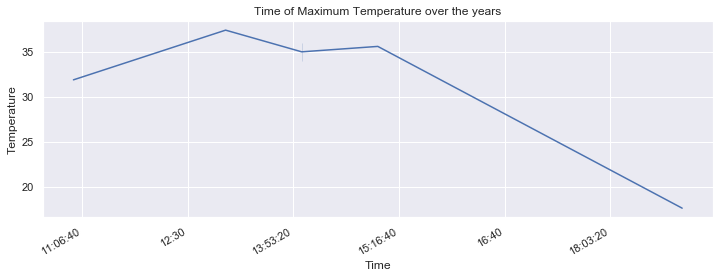

In [117]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x, y)
# Rotate and align the tick labels.
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Temperature")
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_ydata = mdates.DateFormatter('%m')
ax.set_title('Time of Maximum Temperature over the years')


Plotting the minimum temperatures of every year on the Y axis  and their occurence over time of day 

In [118]:
x=df_cold["Time"]

In [119]:
y= df_cold["Wert"]

Text(0.5, 1.0, 'Time of Minimum Temperature over the years')

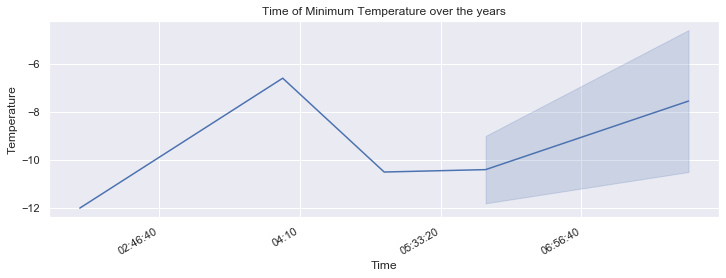

In [120]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x, y)
# Rotate and align the tick labels.
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Temperature")
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_ydata = mdates.DateFormatter('%m')
ax.set_title('Time of Minimum Temperature over the years')

**From now on, instead of focusing the highest temperatures in every year, I would like to analyse in every month for all the years.**

In [121]:
df_hot_month = df_new.groupby((df_new.Zeitstempel.dt.strftime('%y%m'))).apply(lambda group: group[group.Wert == group.Wert.max()])\
  .reset_index(drop=True)

In [122]:
df_cold_month = df_new.groupby((df_new.Zeitstempel.dt.strftime('%y%m'))).apply(lambda group: group[group.Wert == group.Wert.min()])\
  .reset_index(drop=True)

In [123]:
df_hot_month

,Zeitstempel,Wert,Time,Date
0,2015-01-10 03:00:00,12.2,03:00:00,2015-01-10
1,2015-01-10 05:00:00,12.2,05:00:00,2015-01-10
2,2015-01-10 08:00:00,12.2,08:00:00,2015-01-10
3,2015-01-10 11:00:00,12.2,11:00:00,2015-01-10
4,2015-02-14 15:00:00,10.6,15:00:00,2015-02-14
...,...,...,...,...
92,2020-02-16 19:00:00,17.7,19:00:00,2020-02-16
93,2020-02-16 19:15:00,17.7,19:15:00,2020-02-16
94,2020-02-16 19:30:00,17.7,19:30:00,2020-02-16
95,2020-02-16 19:45:00,17.7,19:45:00,2020-02-16


**From the above table for the year 2015, month january, 12.2 was the maximum temperature of that month, and it has occured over 4 different intervals in the same month **

In [124]:
df_cold_month

,Zeitstempel,Wert,Time,Date
0,2015-01-21 06:00:00,-5.0,06:00:00,2015-01-21
1,2015-02-07 04:00:00,-6.6,04:00:00,2015-02-07
2,2015-03-12 03:00:00,-2.5,03:00:00,2015-03-12
3,2015-04-05 05:00:00,-3.0,05:00:00,2015-04-05
4,2015-05-15 03:00:00,1.2,03:00:00,2015-05-15
...,...,...,...,...
78,2019-10-31 06:00:00,-2.5,06:00:00,2019-10-31
79,2019-11-01 06:00:00,-2.6,06:00:00,2019-11-01
80,2019-12-05 06:00:00,-3.7,06:00:00,2019-12-05
81,2020-01-01 08:00:00,-4.6,08:00:00,2020-01-01


**Saving this above information into a csv file**

In [125]:
df_hot_month.drop("Zeitstempel", axis=1 ,inplace = True)

In [126]:
df_cold_month.drop("Zeitstempel", axis=1 ,inplace = True)

In [127]:
df_hot_month.to_csv("maximum_temperature_month.csv")

In [128]:
df_cold_month.to_csv("minimum_temperature_month.csv")

In [129]:
x = df_hot_month["Time"]

In [130]:
y = df_hot_month["Wert"]

Text(0.5, 1.0, 'Time of Maximum Temperature over the years')

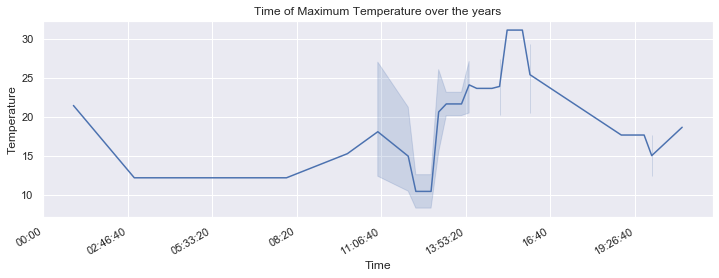

In [131]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x, y)
# Rotate and align the tick labels.
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Temperature")
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_ydata = mdates.DateFormatter('%m')
ax.set_title('Time of Maximum Temperature over the years')

**From the above figure it is evident that highest temperature is around 16:00:00 but a lot of variation of temperature between 11:00:00 to 14:00:00**

In [132]:
x = df_cold_month["Time"]

In [133]:
y = df_cold_month["Wert"]

Text(0.5, 1.0, 'Time of Minimum Temperature over the years')

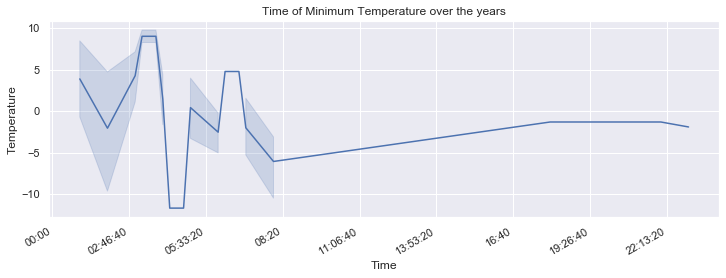

In [134]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x, y)
# Rotate and align the tick labels.
fig.autofmt_xdate()
plt.xlabel("Time")
plt.ylabel("Temperature")
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_ydata = mdates.DateFormatter('%m')
ax.set_title('Time of Minimum Temperature over the years')

There is a linear relationship over the years from 6 AM to 10 PM but large amount of variation in the early hours 